#Prodigy Infotech Datascience Internship - Task 4

#Task: Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

##Importing the necessary python libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Loading the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Twitter_Data.csv to Twitter_Data.csv
Saving Reddit_Data.csv to Reddit_Data.csv


In [ ]:
twitter_df = pd.read_csv('Twitter_Data.csv')
reddit_df = pd.read_csv('Reddit_Data.csv')

##Explore and Understand the Data

In [ ]:
print(twitter_df.head())
print(twitter_df.info())
print(reddit_df.head())
print(reddit_df.info())

                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None
                                       clean_comment  category
0   family mormon have never tried explain them t...         1
1  buddhism has very much lot compatible with chr...         1
2  seriously don say thing first all they won get...        -1
3  what you have learned yours and 

##Data Preprocesing

In [ ]:
twitter_df.rename(columns={'clean_comment': 'text', 'label': 'sentiment'}, inplace=True)
reddit_df.rename(columns={'clean_comment': 'text', 'label': 'sentiment'}, inplace=True)
print(twitter_df.isnull().sum())
print(reddit_df.isnull().sum())
twitter_df.dropna(inplace=True)
reddit_df.dropna(inplace=True)


clean_text    4
category      7
dtype: int64
text        100
category      0
dtype: int64


##Segment Categorization

In [ ]:
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'
twitter_df['sentiment_category'] = twitter_df['sentiment'].apply(categorize_sentiment)
reddit_df['sentiment_category'] = reddit_df['sentiment'].apply(categorize_sentiment)

##Segment Distribution Visualization

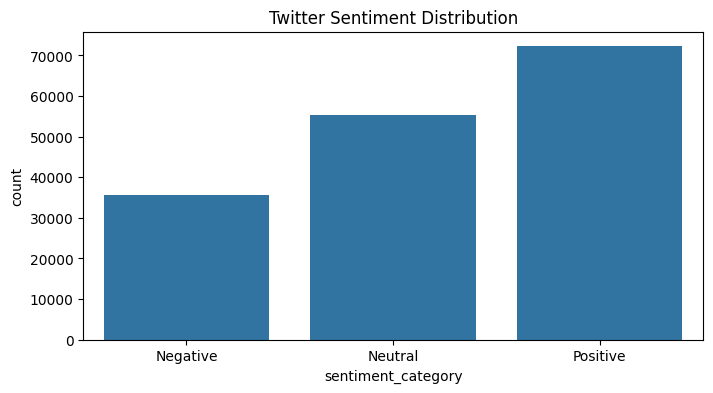

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

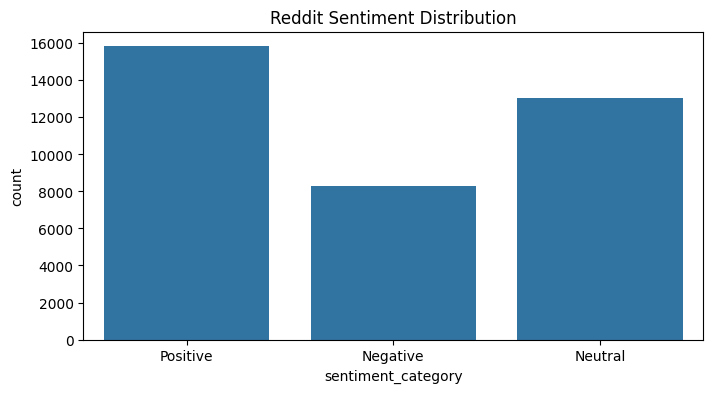

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='sentiment_category', data=twitter_df)
plt.title('Twitter Sentiment Distribution')
plt.savefig('twit sentiment.png', dpi=300, bbox_inches='tight')
plt.show()
from google.colab import files
files.download('twit sentiment.png')


plt.figure(figsize=(8, 4))
sns.countplot(x='sentiment_category', data=reddit_df)
plt.title('Reddit Sentiment Distribution')
plt.savefig('reddit sentiment.png', dpi=300, bbox_inches='tight')
plt.show()
from google.colab import files
files.download('reddit sentiment.png')

##Compare Sentiment Across Platforms

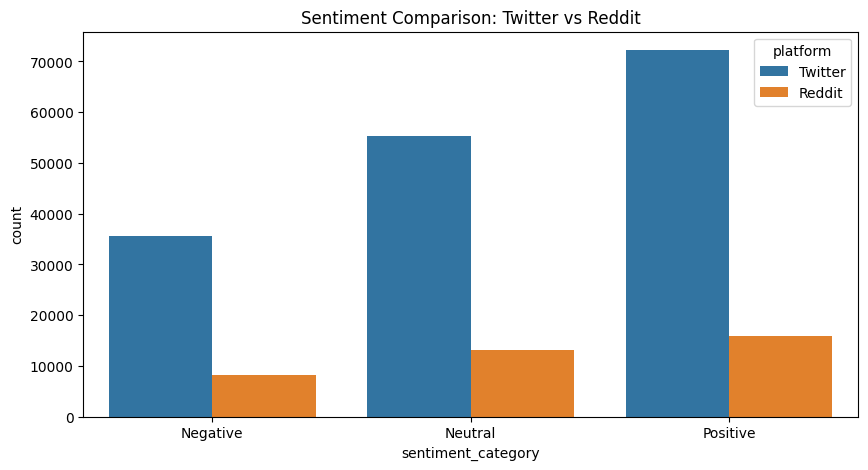

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
twitter_df['platform'] = 'Twitter'
reddit_df['platform'] = 'Reddit'
combined_df = pd.concat([twitter_df, reddit_df])

plt.figure(figsize=(10, 5))
sns.countplot(x='sentiment_category', hue='platform', data=combined_df)
plt.title('Sentiment Comparison: Twitter vs Reddit')
plt.savefig('comparision.png', dpi=300, bbox_inches='tight')
plt.show()
from google.colab import files
files.download('comparision.png')

##Word Cloud for Sentiment Categories

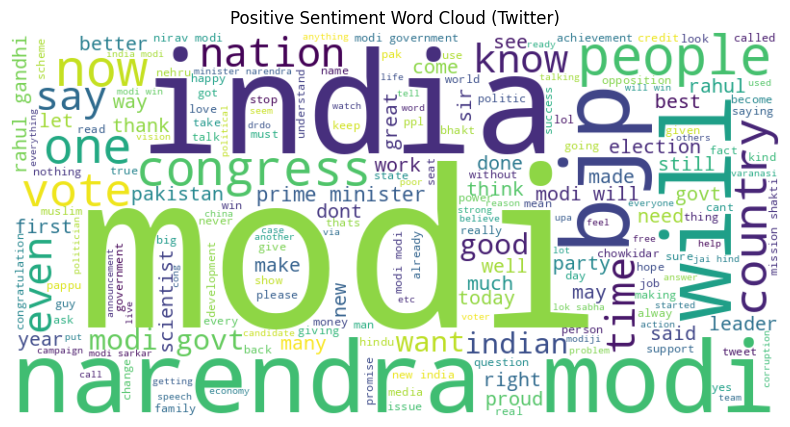

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

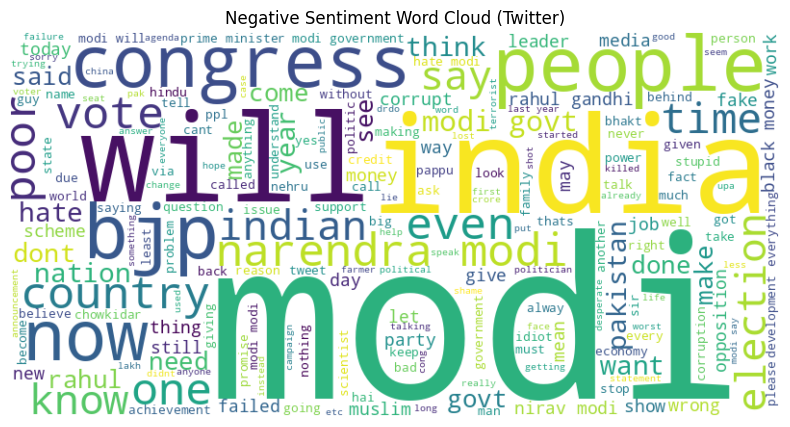

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from wordcloud import WordCloud

positive_text = ' '.join(twitter_df[twitter_df['sentiment_category'] == 'Positive']['text'])
negative_text = ' '.join(twitter_df[twitter_df['sentiment_category'] == 'Negative']['text'])

plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud (Twitter)')
plt.savefig('positive.png', dpi=300, bbox_inches='tight')
plt.show()
from google.colab import files
files.download('positive.png')


plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud (Twitter)')
plt.savefig('negative.png', dpi=300, bbox_inches='tight')
plt.show()
from google.colab import files
files.download('negative.png')